In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_load = pd.read_csv("https://raw.githubusercontent.com/siglimumuni/Datasets/master/customer-data.csv")
data_load.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [3]:
data_load.shape

(10000, 19)

In [4]:
data_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

# **Prepering Data**

In [5]:
data_load.isna().sum()

,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,982
vehicle_ownership,0
vehicle_year,0


In [6]:
data_load.groupby(by='income')['credit_score'].mean()

,credit_score
income,
middle class,0.523659
poverty,0.348331
upper class,0.613827
working class,0.431929


In [7]:
#Create a function to impute missing values based on mean credit score for each income group
def impute_creditscore(income_classes):
    """This function takes a list of income groups and imputes the missing values of each based on the mean credit score for          each group"""
    #iterate through each income group
    for income_class in income_classes:

        #create a subset of dataframe to use as filter
        mask = data_load["income"] == income_class

        #calculate the mean for the income group
        mean = data_load[data_load["income"] == income_class]["credit_score"].mean()

        #fill the missing values with mean of credit score for group
        data_load.loc[mask,"credit_score"] = data_load.loc[mask,'credit_score'].fillna(mean)

In [8]:
#Apply the function to the dataframe
income_groups = ["poverty","upper class","middle class","working class"]
impute_creditscore(income_groups)

#check for missing values
data_load.isna().sum()

,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,0
vehicle_ownership,0
vehicle_year,0


In [9]:
data_load.groupby(by='driving_experience')['annual_mileage'].mean()

,annual_mileage
driving_experience,
0-9y,12249.131670
10-19y,11791.275168
20-29y,11144.181256
30y+,10694.968553


In [ ]:
data_load['annual_mileage'] = data_load['annual_mileage'].fillna(data_load['annual_mileage'].mean())
data_load.isna().sum()

,0
id,0
age,0
gender,0
race,0
driving_experience,0
education,0
income,0
credit_score,0
vehicle_ownership,0
vehicle_year,0


In [10]:
data_load.drop(['id','postal_code'], axis= 1, inplace = True)
data_load.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,12000.0,sedan,0,0,0,False
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,16000.0,sedan,0,0,0,True
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,11000.0,sedan,0,0,0,False
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,11000.0,sedan,0,0,0,False
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,12000.0,sedan,2,0,1,True


In [11]:
data_load.groupby(by=['driving_experience','education'])['credit_score'].mean()

driving_experience  education  
0-9y                high school    0.450483
                    none           0.385837
                    university     0.542421
10-19y              high school    0.506217
                    none           0.416853
                    university     0.565567
20-29y              high school    0.562001
                    none           0.472653
                    university     0.597711
30y+                high school    0.594606
                    none           0.533738
                    university     0.611875
Name: credit_score, dtype: float64

In [12]:
data_load['gender'].value_counts()

,count
gender,
female,5010
male,4990


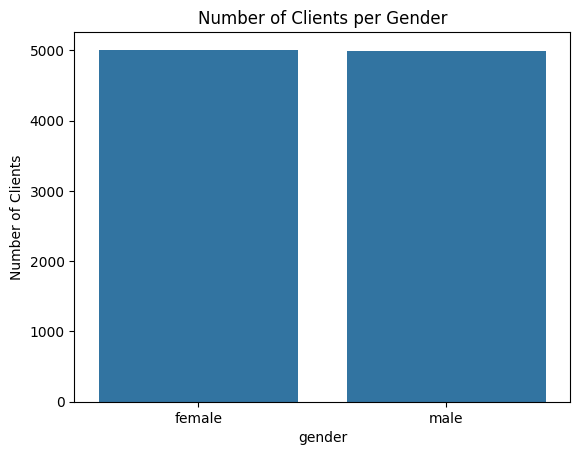

In [13]:
sns.countplot(data = data_load, x = 'gender')
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients")
plt.show()

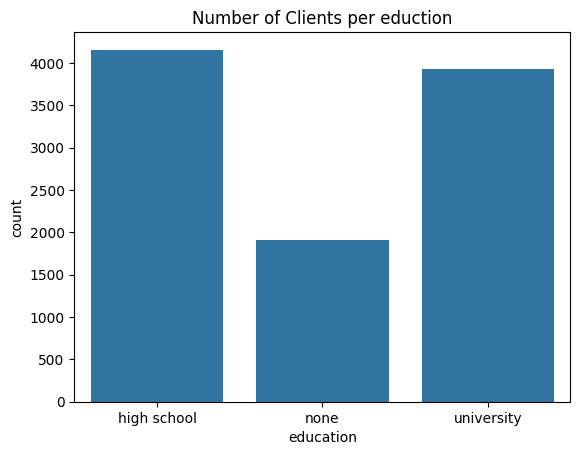

In [14]:
sns.countplot(data = data_load, x = 'education')
plt.title('Number of Clients per eduction')
plt.ylabel('count')
plt.show()

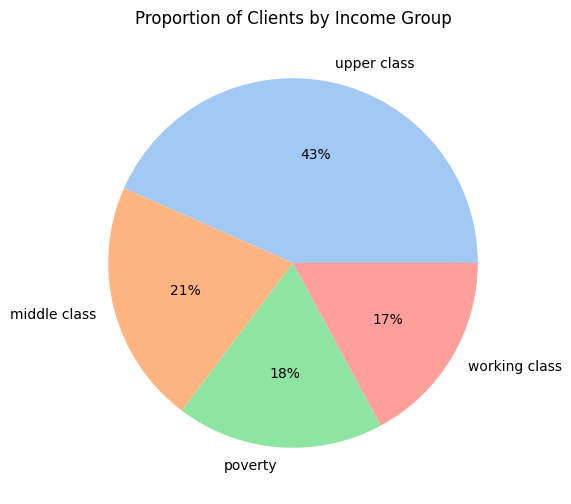

In [15]:
plt.figure(figsize=[6,6])
datas = data_load['income'].value_counts(normalize=True)
labels = ["upper class","middle class","poverty","working class"]
colors = sns.color_palette('pastel')
plt.pie(datas,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Clients by Income Group")
plt.show()

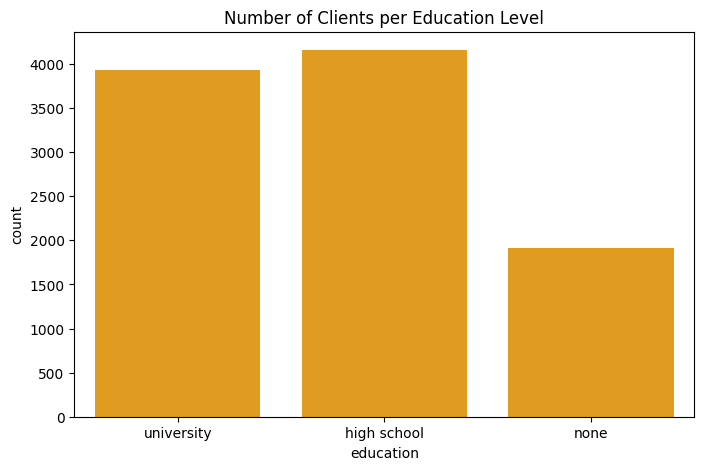

In [16]:
#Create a countplot to visualize the count of each category in the education column
plt.figure(figsize=[8,5])
sns.countplot(data=data_load,x="education",order=["university","high school","none"],color="orange")
plt.title("Number of Clients per Education Level")
plt.show()

In [17]:
data_load["credit_score"].describe()

,credit_score
count,10000.000000
mean,0.515247
std,0.134628
min,0.053358
25%,0.421301
50%,0.523659
75%,0.613827
max,0.960819


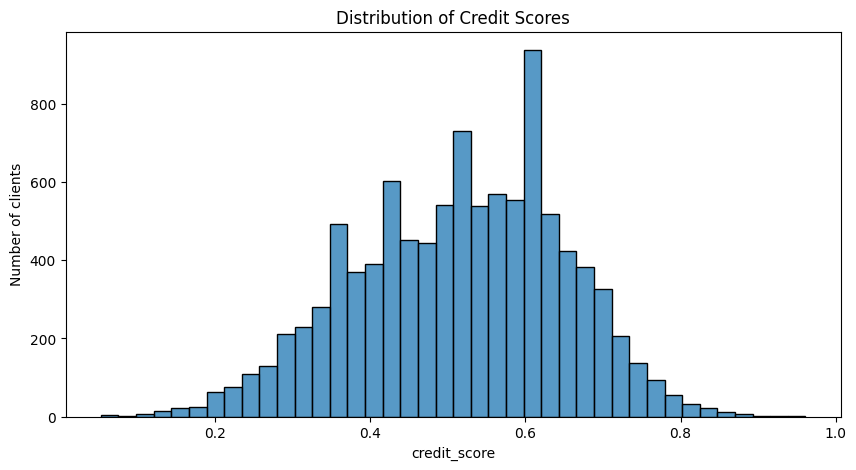

In [18]:
plt.figure(figsize=[10,5])
sns.histplot(data = data_load, x = 'credit_score', bins = 40)
plt.title("Distribution of Credit Scores")
plt.ylabel('Number of clients')
plt.show()

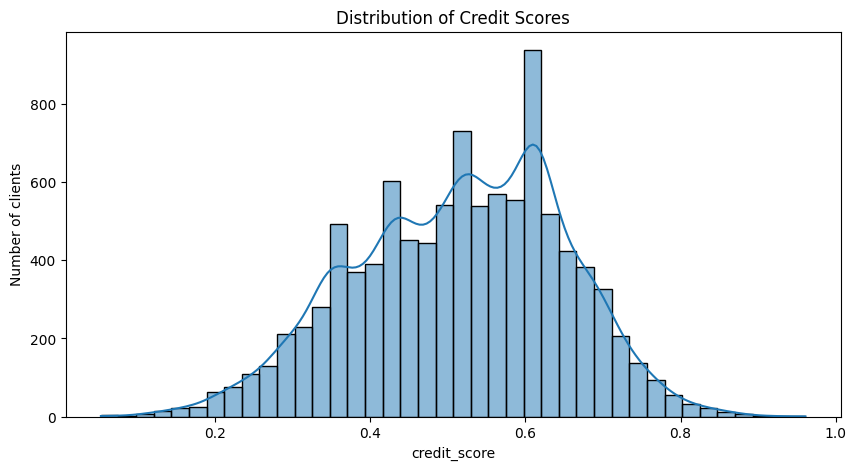

In [19]:
plt.figure(figsize=[10,5])
sns.histplot(data = data_load, x = 'credit_score', bins = 40, kde = True)
plt.title("Distribution of Credit Scores")
plt.ylabel('Number of clients')
plt.show()

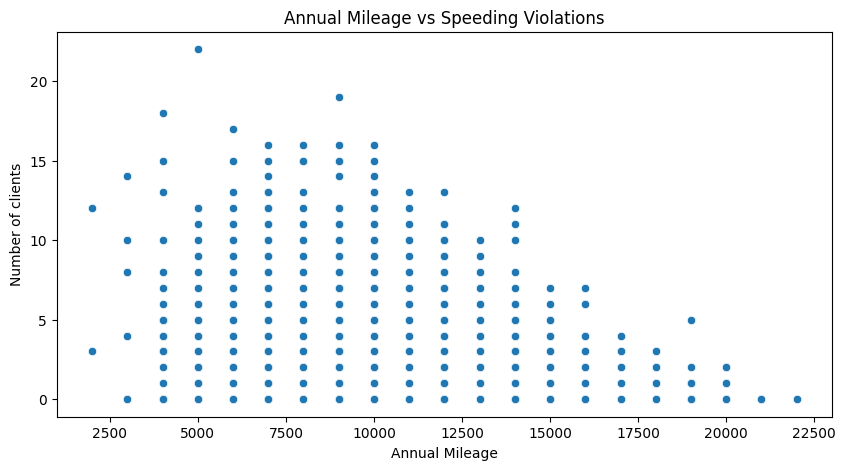

In [20]:
plt.figure(figsize=[10,5])
sns.scatterplot(data = data_load, x = 'annual_mileage', y = 'speeding_violations')
plt.title("Annual Mileage vs Speeding Violations")
plt.ylabel('Number of clients')
plt.xlabel('Annual Mileage')
plt.show()

In [21]:
corr_matrix = data_load[["speeding_violations","DUIs","past_accidents"]].corr()
corr_matrix

,speeding_violations,DUIs,past_accidents
speeding_violations,1.000000,0.359838,0.443074
DUIs,0.359838,1.000000,0.259359
past_accidents,0.443074,0.259359,1.000000


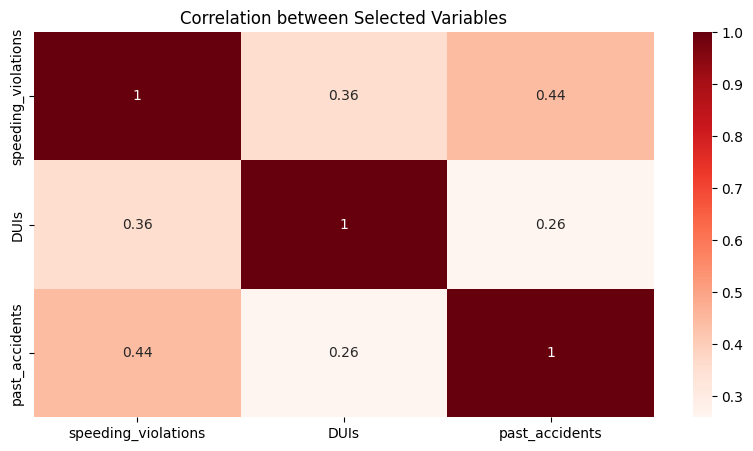

In [22]:
plt.figure(figsize=[10,5])
sns.heatmap(corr_matrix, annot = True, cmap = 'Reds')
plt.title("Correlation between Selected Variables")
plt.show()

In [23]:
data_load.groupby(by='outcome')['annual_mileage'].mean()

,annual_mileage
outcome,
False,11342.852559
True,12482.562278


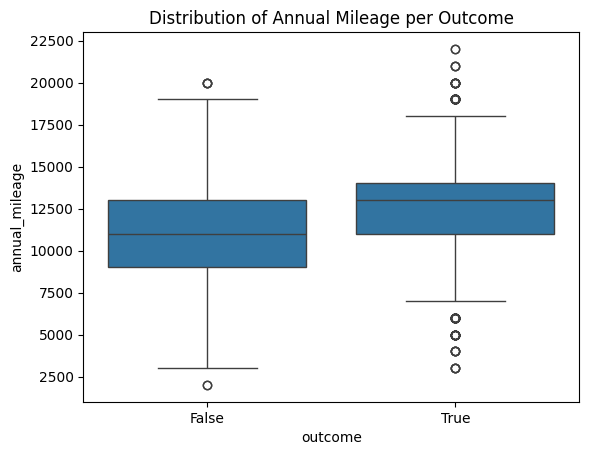

In [24]:
sns.boxplot(data = data_load, x = 'outcome', y = 'annual_mileage')
plt.title("Distribution of Annual Mileage per Outcome")
plt.show()

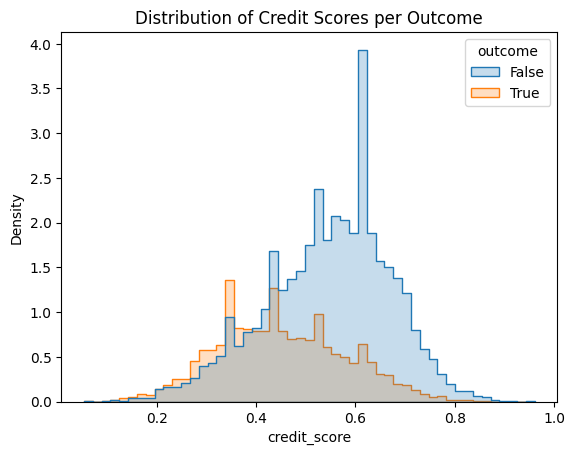

In [25]:
sns.histplot(data = data_load, x = 'credit_score', hue = 'outcome', element='step', stat = 'density')
plt.title("Distribution of Credit Scores per Outcome")
plt.show()

In [26]:
data_load ['claim_rate'] = np.where(data_load['outcome']==True,1,0)
data_load ['claim_rate'].value_counts()

,count
claim_rate,
0,6867
1,3133


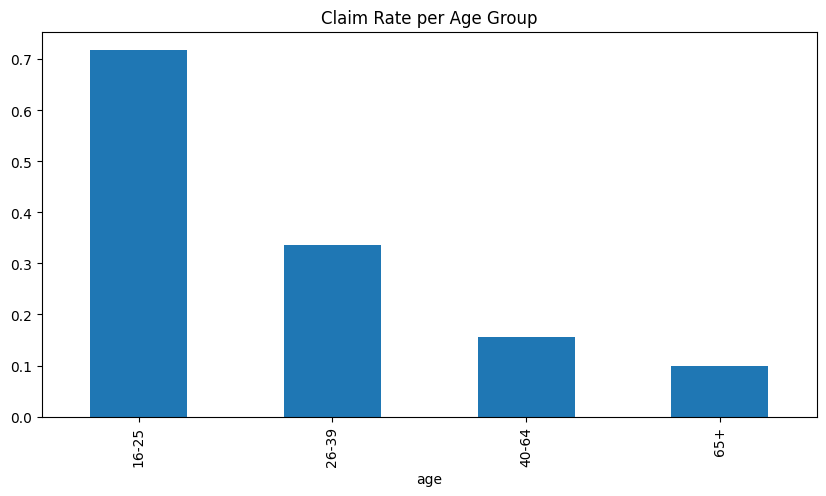

In [27]:
plt.figure(figsize=[10,5])
data_load.groupby(by='age')['claim_rate'].mean().plot(kind='bar')
plt.title("Claim Rate per Age Group")
plt.show()

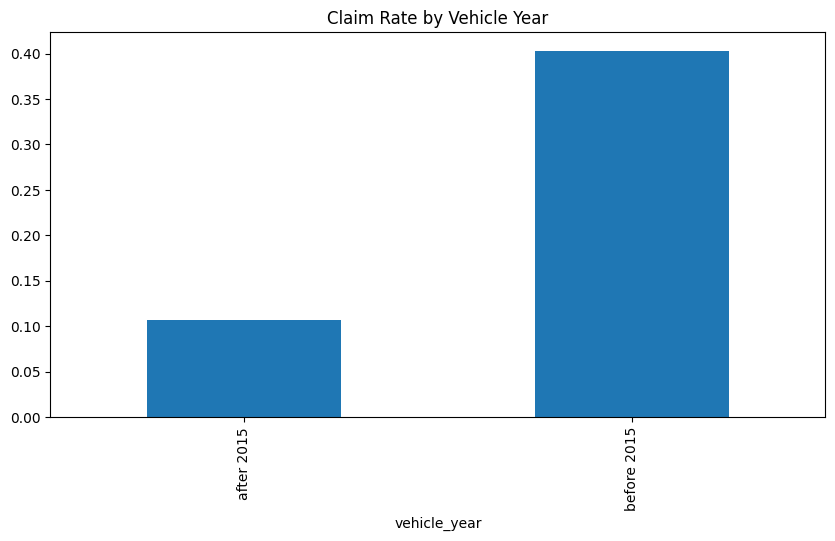

In [28]:
plt.figure(figsize=[10,5])
data_load.groupby(by='vehicle_year')['claim_rate'].mean().plot(kind='bar')
plt.title("Claim Rate by Vehicle Year")
plt.show()

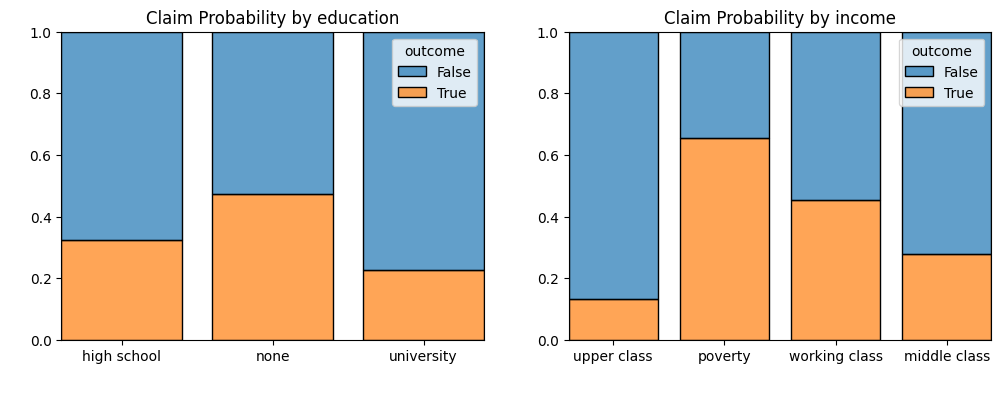

In [29]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

for i,col in enumerate(["education","income"]):
    sns.histplot(data_load, ax=axes[i],x=col, hue="outcome",stat="probability", multiple="fill", shrink=.8,alpha=0.7)
    axes[i].set(title="Claim Probability by "+ col,ylabel=" ",xlabel=" ")

In [31]:
edu_income = pd.pivot_table(data = data_load, index = 'education', columns='income', values='claim_rate', aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


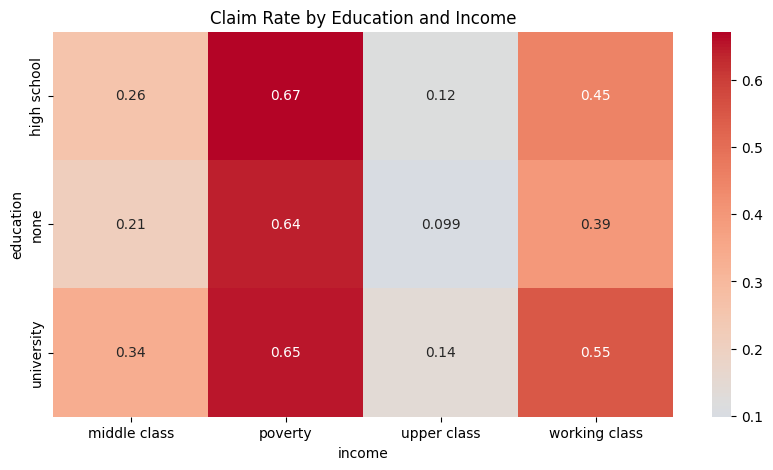

In [47]:
plt.figure(figsize=[10,5])
sns.heatmap(edu_income, annot = True, cmap =  'coolwarm', center=0.117)
plt.title('Claim Rate by Education and Income')
plt.show()

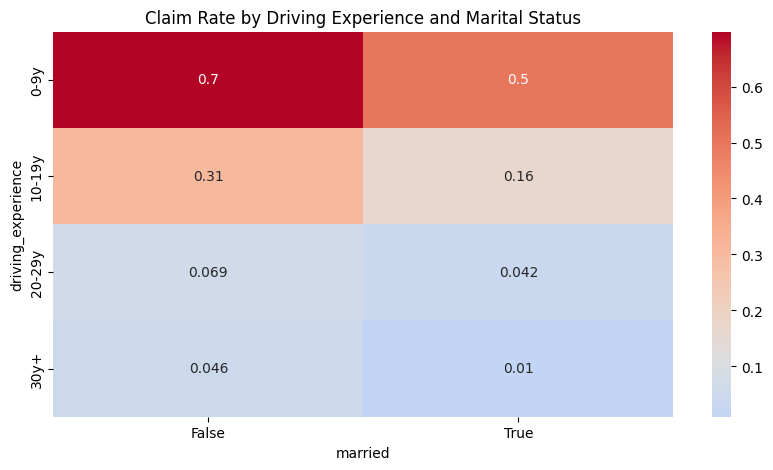

In [49]:
driver_maried = pd.pivot_table(data = data_load, index = 'driving_experience', columns='married',
                               values='claim_rate')
plt.figure(figsize=[10,5])
sns.heatmap(driver_maried, annot = True, cmap =  'coolwarm', center=0.117)
plt.title('Claim Rate by Driving Experience and Marital Status')
plt.show()

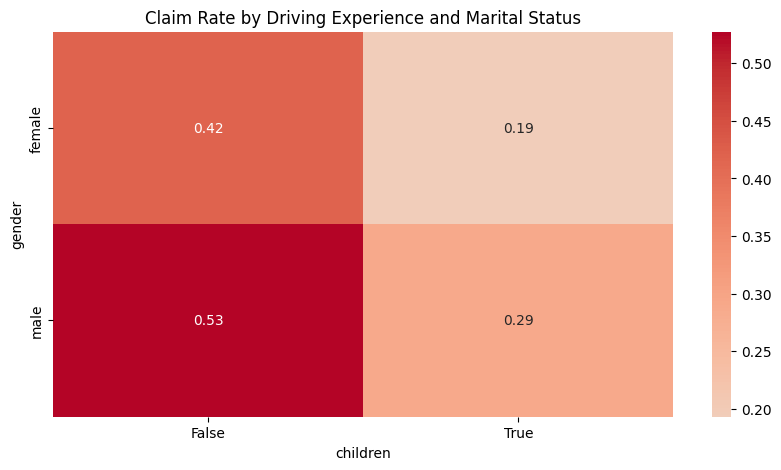

In [48]:
dgender_children = pd.pivot_table(data=data_load,index='gender',columns='children',values='claim_rate')

plt.figure(figsize=[10,5])
sns.heatmap(dgender_children, annot = True, cmap =  'coolwarm', center=0.117)
plt.title('Claim Rate by Driving Experience and Marital Status')
plt.show()